## 주성분분석을 이용한 차원축소
   - 변수간의 상관관계가 높은 경우 유용, 연속형변수

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # to draw graphs
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/데이터마이닝수업/Data/BostonHousing.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


+ 상관계수 산출

In [6]:
corr = df.corr(method='pearson')
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.273687


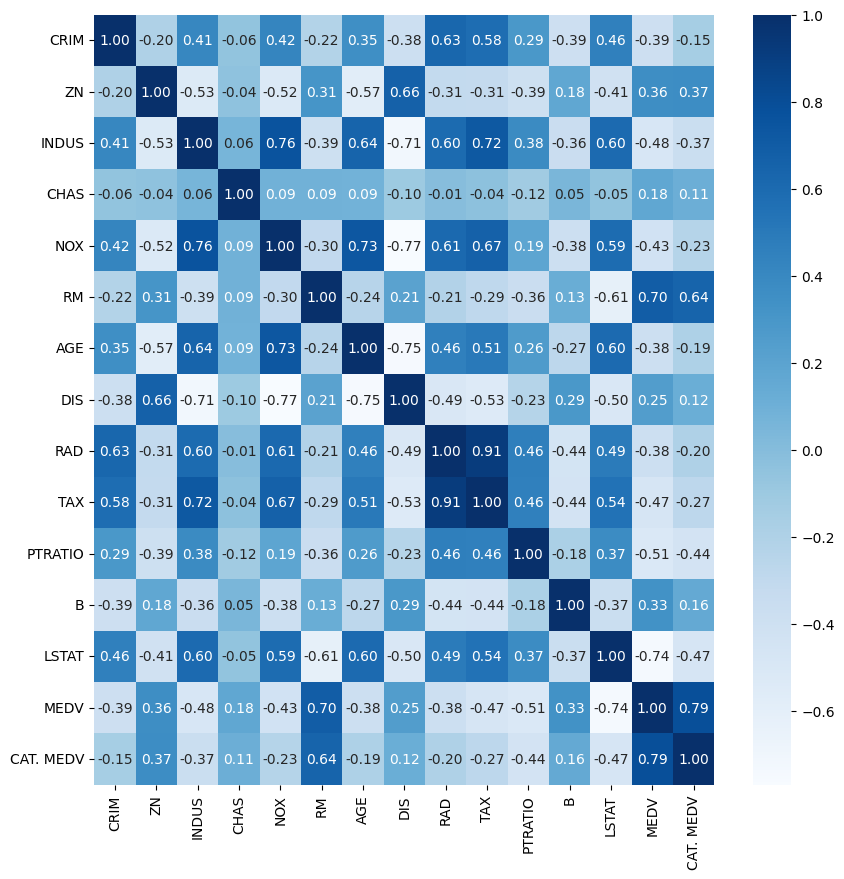

In [22]:
plt.figure(figsize = (10,10))

sns.heatmap(corr
           ,annot=True
           ,cmap='Blues'
           ,fmt='.2f'
            )
plt.show()

In [23]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

In [ ]:
#sns.set(style='whitegrid')
sns.pairplot(df[['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','PTRATIO','B','LSTAT']])
plt.show()

+ 주성분분석 모듈 불러오기 및 실행

In [116]:
from sklearn.decomposition import PCA

pca = PCA(random_state=1004)
pca.fit(df[['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','PTRATIO','B','LSTAT']])

print(pca.components_)
print(pca.explained_variance_ratio_)

[[ 3.72537253e-02 -5.22335978e-02  2.85814801e-02  5.13718275e-04
  -1.07416521e-03  9.51000907e-02 -7.38117298e-03  4.48810821e-03
  -9.92487807e-01  3.02455446e-02]
 [-6.59070109e-02  5.79980614e-01 -1.30950958e-01 -2.35048951e-03
   6.36196213e-03 -7.82302475e-01  4.92888278e-02 -2.14924716e-02
  -1.15779550e-01 -1.17436021e-01]
 [ 6.74376506e-02  8.08203284e-01  1.11737867e-02  9.07082652e-04
   4.53740823e-03  5.81379227e-01  2.26822501e-03 -2.44100499e-02
   1.76181514e-02  5.65698685e-02]
 [ 9.05846728e-01  1.41270078e-02  2.09515986e-01  2.18582446e-03
  -2.43606280e-02 -1.57922900e-01 -2.49162329e-02  6.81202184e-02
   3.44777069e-02  3.21492504e-01]
 [ 4.09159361e-01 -6.30638766e-02 -5.07311746e-01 -3.55283920e-03
   6.27807955e-02  1.18967155e-01  1.00299942e-02 -6.59204594e-02
  -7.54789010e-03 -7.40699699e-01]
 [-3.86446049e-03 -4.60280623e-02 -8.16877861e-01 -5.70345373e-03
  -2.91195338e-02  2.47776947e-02  9.98140042e-02 -7.48516021e-03
  -2.40677956e-03  5.64852174e-01

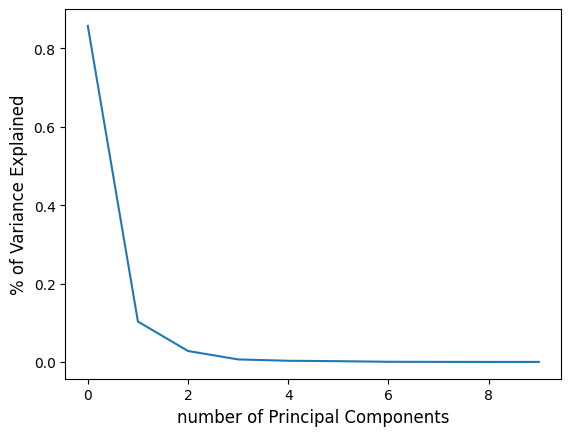

In [38]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("number of Principal Components", fontsize=12)
plt.ylabel("% of Variance Explained", fontsize=12)
plt.show()

In [122]:
pca = PCA(n_components=2,random_state=1004)
df_pca=pca.fit_transform(df[['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','PTRATIO','B','LSTAT']])
df_pca
#print(sum(pca.explained_variance_ratio_))

array([[-41.22677784,   4.21076527],
       [-38.71617435, -18.07099098],
       [-36.52490673,  -3.06982423],
       ...,
       [-37.49668699, -27.96792958],
       [-34.20848754, -26.33068575],
       [-38.40093021, -20.2400046 ]])

In [123]:
df1 = pd.DataFrame(df_pca, columns=['PCA1','PCA2'])
df1

,PCA1,PCA2
0,-41.226778,4.210765
1,-38.716174,-18.070991
2,-36.524907,-3.069824
3,-39.942807,9.492490
4,-41.323420,2.376188
...,...,...
501,-34.586190,-10.727521
502,-38.753117,-17.183494
503,-37.496687,-27.967930
504,-34.208488,-26.330686


In [124]:
df2 = pd.concat([df1, df[["MEDV","CAT. MEDV"]]], axis=1)
df2

,PCA1,PCA2,MEDV,CAT. MEDV
0,-41.226778,4.210765,24.0,0
1,-38.716174,-18.070991,21.6,0
2,-36.524907,-3.069824,34.7,1
3,-39.942807,9.492490,33.4,1
4,-41.323420,2.376188,36.2,1
...,...,...,...,...
501,-34.586190,-10.727521,22.4,0
502,-38.753117,-17.183494,20.6,0
503,-37.496687,-27.967930,23.9,0
504,-34.208488,-26.330686,22.0,0


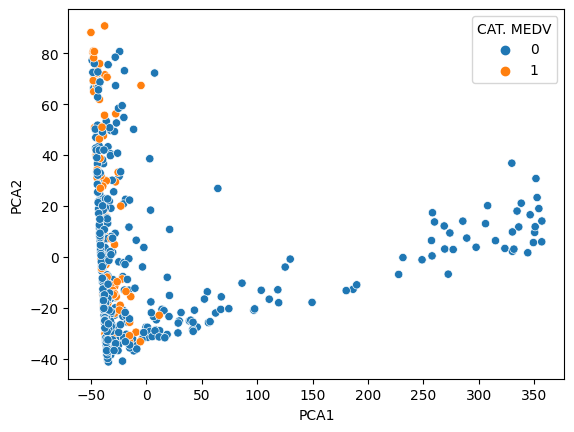

In [137]:
sns.scatterplot(x="PCA1", y="PCA2", hue="CAT. MEDV", data=df2)
plt.show()

In [58]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

회귀모델을 이용한 차원축소

In [59]:
from statsmodels.formula.api import ols

model = ols('MEDV ~ CRIM + CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=df)
res   = model.fit()

In [64]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 24 Sep 2023   Prob (F-statistic):          6.72e-135
Time:                        02:19:08   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [148]:
import statsmodels.api as sm
# Logistic Reression
log_reg = sm.Logit(df['CAT. MEDV'], df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.116354
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:              CAT. MEDV   No. Observations:                  506
Model:                          Logit   Df Residuals:                      493
Method:                           MLE   Df Model:                           12
Date:                Sun, 24 Sep 2023   Pseudo R-squ.:                  0.7411
Time:                        03:53:41   Log-Likelihood:                -58.875
converged:                       True   LL-Null:                       -227.45
Covariance Type:            nonrobust   LLR p-value:                 7.213e-65
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM           0.0487      0.046      1.056      0.291      -0.042       0.139
ZN             0.0233      0

## 차원축소된 변수를 이용하여 예측모형 만들기

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
lr = LinearRegression()
PCA_model = lr.fit(df2[['PCA1','PCA2']], df2['MEDV'])
# forecasting/regression
y_pred1=PCA_model.predict(df2[['PCA1','PCA2']])
y_pred1

+ 주성분분석을 통한 차원축소 모형의 성능평가(MAE, MSE)

In [103]:
print("MAE:",mean_absolute_error(y_pred1, df['MEDV']))
print("MSE:", mean_squared_error(y_pred1, df['MEDV']))
print("RMSE:", mean_squared_error(y_pred1, df['MEDV'])**0.5)

MAE: 5.511096170219975
MSE: 64.00788000199991
RMSE: 8.000492484966154


In [105]:
lr_model = LinearRegression().fit(df[['CRIM','CRIM','ZN','CHAS','NOX','RM','DIS','RAD','TAX','PTRATIO','B','LSTAT']], df['MEDV'])

In [106]:
y_pred2=lr_model.predict(df[['CRIM','CRIM','ZN','CHAS','NOX','RM','DIS','RAD','TAX','PTRATIO','B','LSTAT']])
#y_pred2

In [107]:
print("MAE:",mean_absolute_error(y_pred2, df['MEDV']))
print("MSE:", mean_squared_error(y_pred2, df['MEDV']))
print("RMSE:", mean_squared_error(y_pred2, df['MEDV'])**0.5)

MAE: 3.272036041027301
MSE: 21.899928759752196
RMSE: 4.679735971158223
